In [2]:
#basic libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

#system libs
import os
from glob import glob


#raster libraries
import rasterio as rio
import rasterio.mask
import rasterio.plot
import earthpy.spatial as es
import earthpy.plot as ep

np.random.seed(42)


In [14]:
file_path = '../output/stacked_landsat.tif'

with rio.open(file_path, 'r') as src:
    metadata = src.profile
    img = src.read()

In [15]:
img.shape

(7, 3901, 2043)

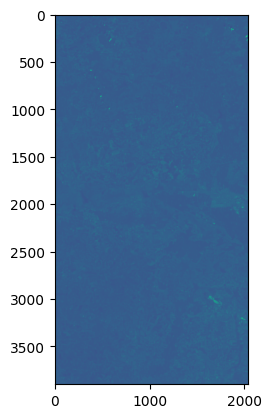

<Axes: >

In [16]:
rasterio.plot.show(img[0])

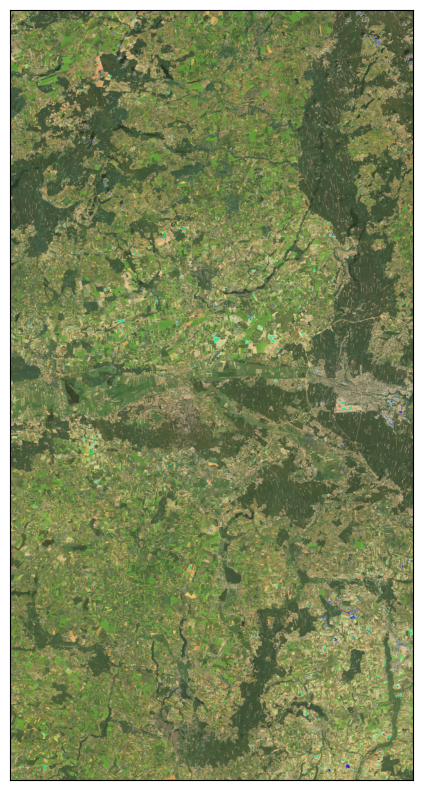

In [17]:
ep.plot_rgb(img*10, #multipling by 10 so we can visualize better
            rgb = [3,2,1]
            )
plt.show()

In [ ]:
#| We are going to add more normalized differences to improve the model

# agriculture: swir-1 + NIR + blue -> this highlights agriculture
#ndvi = b5-b4 / b5+b4 -> this highlights vegetation
#ndwi b3 - b5 / b3 + b5 -> this highlights water
#ndbi b6-b5/b6+b5 -> this highlights built areas
# short-wave infrared swir + nir + red  -> this highlights forests